## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 51.7ms	remaining: 51.6s
1:	learn: 0.9301086	total: 55.5ms	remaining: 27.7s
2:	learn: 0.9005637	total: 58.5ms	remaining: 19.5s
3:	learn: 0.8720983	total: 61.6ms	remaining: 15.3s
4:	learn: 0.8467410	total: 64.5ms	remaining: 12.8s
5:	learn: 0.8226672	total: 67.3ms	remaining: 11.2s
6:	learn: 0.7994702	total: 70.2ms	remaining: 9.96s
7:	learn: 0.7784272	total: 73ms	remaining: 9.05s
8:	learn: 0.7602192	total: 75.9ms	remaining: 8.36s
9:	learn: 0.7412421	total: 78.8ms	remaining: 7.8s
10:	learn: 0.7247930	total: 81.8ms	remaining: 7.36s
11:	learn: 0.7089951	total: 84.7ms	remaining: 6.97s
12:	learn: 0.6951345	total: 87.4ms	remaining: 6.64s
13:	learn: 0.6809276	total: 90.3ms	remaining: 6.36s
14:	learn: 0.6692630	total: 93.3ms	remaining: 6.13s
15:	learn: 0.6588323	total: 96.1ms	remaining: 5.91s
16:	learn: 0.6472700	total: 98.7ms	remaining: 5.71s
17:	learn: 0.6379982	total: 102ms	remaining: 5.54s
18:	learn: 0.6294674	total: 105ms	remaining: 5.4

40:	learn: 0.5196440	total: 173ms	remaining: 4.04s
41:	learn: 0.5170220	total: 176ms	remaining: 4.01s
42:	learn: 0.5141148	total: 179ms	remaining: 3.98s
43:	learn: 0.5116444	total: 182ms	remaining: 3.94s
44:	learn: 0.5100547	total: 184ms	remaining: 3.91s
45:	learn: 0.5069096	total: 187ms	remaining: 3.88s
46:	learn: 0.5051685	total: 190ms	remaining: 3.86s
47:	learn: 0.5033968	total: 193ms	remaining: 3.83s
48:	learn: 0.5012433	total: 196ms	remaining: 3.8s
49:	learn: 0.4986132	total: 199ms	remaining: 3.78s
50:	learn: 0.4968022	total: 202ms	remaining: 3.75s
51:	learn: 0.4951632	total: 205ms	remaining: 3.73s
52:	learn: 0.4928924	total: 207ms	remaining: 3.71s
53:	learn: 0.4917272	total: 210ms	remaining: 3.68s
54:	learn: 0.4895079	total: 213ms	remaining: 3.66s
55:	learn: 0.4881884	total: 216ms	remaining: 3.64s
56:	learn: 0.4861566	total: 219ms	remaining: 3.62s
57:	learn: 0.4850201	total: 222ms	remaining: 3.6s
58:	learn: 0.4840055	total: 225ms	remaining: 3.58s
59:	learn: 0.4824455	total: 228ms

104:	learn: 0.4461730	total: 365ms	remaining: 3.11s
105:	learn: 0.4457259	total: 369ms	remaining: 3.11s
106:	learn: 0.4451085	total: 372ms	remaining: 3.1s
107:	learn: 0.4447909	total: 375ms	remaining: 3.1s
108:	learn: 0.4440936	total: 377ms	remaining: 3.08s
109:	learn: 0.4435519	total: 380ms	remaining: 3.08s
110:	learn: 0.4431075	total: 383ms	remaining: 3.07s
111:	learn: 0.4425498	total: 386ms	remaining: 3.06s
112:	learn: 0.4419106	total: 388ms	remaining: 3.05s
113:	learn: 0.4414425	total: 391ms	remaining: 3.04s
114:	learn: 0.4407446	total: 394ms	remaining: 3.03s
115:	learn: 0.4402011	total: 397ms	remaining: 3.02s
116:	learn: 0.4398559	total: 400ms	remaining: 3.02s
117:	learn: 0.4392990	total: 402ms	remaining: 3.01s
118:	learn: 0.4389153	total: 405ms	remaining: 3s
119:	learn: 0.4383331	total: 408ms	remaining: 2.99s
120:	learn: 0.4378136	total: 411ms	remaining: 2.98s
121:	learn: 0.4375553	total: 413ms	remaining: 2.97s
122:	learn: 0.4369995	total: 416ms	remaining: 2.97s
123:	learn: 0.436

171:	learn: 0.4156228	total: 557ms	remaining: 2.68s
172:	learn: 0.4153041	total: 560ms	remaining: 2.67s
173:	learn: 0.4148857	total: 562ms	remaining: 2.67s
174:	learn: 0.4144190	total: 565ms	remaining: 2.66s
175:	learn: 0.4140875	total: 568ms	remaining: 2.66s
176:	learn: 0.4136755	total: 571ms	remaining: 2.65s
177:	learn: 0.4133860	total: 573ms	remaining: 2.65s
178:	learn: 0.4129780	total: 576ms	remaining: 2.64s
179:	learn: 0.4122907	total: 579ms	remaining: 2.64s
180:	learn: 0.4119188	total: 582ms	remaining: 2.63s
181:	learn: 0.4115412	total: 585ms	remaining: 2.63s
182:	learn: 0.4112620	total: 587ms	remaining: 2.62s
183:	learn: 0.4107734	total: 590ms	remaining: 2.62s
184:	learn: 0.4104881	total: 593ms	remaining: 2.61s
185:	learn: 0.4100009	total: 595ms	remaining: 2.6s
186:	learn: 0.4096453	total: 598ms	remaining: 2.6s
187:	learn: 0.4093395	total: 601ms	remaining: 2.6s
188:	learn: 0.4090020	total: 604ms	remaining: 2.59s
189:	learn: 0.4085981	total: 607ms	remaining: 2.59s
190:	learn: 0.4

236:	learn: 0.3941497	total: 747ms	remaining: 2.4s
237:	learn: 0.3939819	total: 750ms	remaining: 2.4s
238:	learn: 0.3938322	total: 753ms	remaining: 2.4s
239:	learn: 0.3935463	total: 756ms	remaining: 2.39s
240:	learn: 0.3933166	total: 759ms	remaining: 2.39s
241:	learn: 0.3930992	total: 762ms	remaining: 2.39s
242:	learn: 0.3928898	total: 765ms	remaining: 2.38s
243:	learn: 0.3926199	total: 768ms	remaining: 2.38s
244:	learn: 0.3923955	total: 771ms	remaining: 2.38s
245:	learn: 0.3922312	total: 775ms	remaining: 2.37s
246:	learn: 0.3919499	total: 778ms	remaining: 2.37s
247:	learn: 0.3917420	total: 781ms	remaining: 2.37s
248:	learn: 0.3915186	total: 784ms	remaining: 2.36s
249:	learn: 0.3912759	total: 787ms	remaining: 2.36s
250:	learn: 0.3908375	total: 790ms	remaining: 2.36s
251:	learn: 0.3904815	total: 793ms	remaining: 2.35s
252:	learn: 0.3902127	total: 796ms	remaining: 2.35s
253:	learn: 0.3900274	total: 808ms	remaining: 2.37s
254:	learn: 0.3898171	total: 811ms	remaining: 2.37s
255:	learn: 0.3

299:	learn: 0.3795554	total: 940ms	remaining: 2.19s
300:	learn: 0.3793733	total: 943ms	remaining: 2.19s
301:	learn: 0.3791607	total: 946ms	remaining: 2.19s
302:	learn: 0.3789297	total: 949ms	remaining: 2.18s
303:	learn: 0.3787482	total: 952ms	remaining: 2.18s
304:	learn: 0.3786528	total: 954ms	remaining: 2.17s
305:	learn: 0.3784406	total: 957ms	remaining: 2.17s
306:	learn: 0.3782934	total: 960ms	remaining: 2.17s
307:	learn: 0.3781631	total: 962ms	remaining: 2.16s
308:	learn: 0.3779278	total: 965ms	remaining: 2.16s
309:	learn: 0.3777358	total: 968ms	remaining: 2.15s
310:	learn: 0.3775809	total: 971ms	remaining: 2.15s
311:	learn: 0.3774323	total: 973ms	remaining: 2.15s
312:	learn: 0.3772732	total: 977ms	remaining: 2.14s
313:	learn: 0.3771184	total: 982ms	remaining: 2.14s
314:	learn: 0.3769370	total: 985ms	remaining: 2.14s
315:	learn: 0.3766643	total: 987ms	remaining: 2.14s
316:	learn: 0.3764891	total: 990ms	remaining: 2.13s
317:	learn: 0.3762751	total: 993ms	remaining: 2.13s
318:	learn: 

359:	learn: 0.3686485	total: 1.13s	remaining: 2s
360:	learn: 0.3685749	total: 1.13s	remaining: 2s
361:	learn: 0.3683909	total: 1.13s	remaining: 2s
362:	learn: 0.3682710	total: 1.14s	remaining: 1.99s
363:	learn: 0.3681254	total: 1.14s	remaining: 1.99s
364:	learn: 0.3679761	total: 1.14s	remaining: 1.99s
365:	learn: 0.3677932	total: 1.14s	remaining: 1.98s
366:	learn: 0.3676022	total: 1.15s	remaining: 1.98s
367:	learn: 0.3674148	total: 1.15s	remaining: 1.97s
368:	learn: 0.3673439	total: 1.15s	remaining: 1.97s
369:	learn: 0.3671985	total: 1.15s	remaining: 1.97s
370:	learn: 0.3670563	total: 1.16s	remaining: 1.96s
371:	learn: 0.3669128	total: 1.16s	remaining: 1.96s
372:	learn: 0.3668381	total: 1.16s	remaining: 1.96s
373:	learn: 0.3666564	total: 1.17s	remaining: 1.95s
374:	learn: 0.3663789	total: 1.17s	remaining: 1.95s
375:	learn: 0.3661576	total: 1.17s	remaining: 1.94s
376:	learn: 0.3659742	total: 1.17s	remaining: 1.94s
377:	learn: 0.3658330	total: 1.18s	remaining: 1.94s
378:	learn: 0.3656680

415:	learn: 0.3595791	total: 1.32s	remaining: 1.85s
416:	learn: 0.3594487	total: 1.32s	remaining: 1.85s
417:	learn: 0.3592759	total: 1.33s	remaining: 1.85s
418:	learn: 0.3591088	total: 1.33s	remaining: 1.84s
419:	learn: 0.3589470	total: 1.33s	remaining: 1.84s
420:	learn: 0.3587972	total: 1.34s	remaining: 1.84s
421:	learn: 0.3586831	total: 1.34s	remaining: 1.83s
422:	learn: 0.3585620	total: 1.34s	remaining: 1.83s
423:	learn: 0.3584427	total: 1.34s	remaining: 1.83s
424:	learn: 0.3583044	total: 1.35s	remaining: 1.82s
425:	learn: 0.3581698	total: 1.35s	remaining: 1.82s
426:	learn: 0.3580461	total: 1.35s	remaining: 1.82s
427:	learn: 0.3579182	total: 1.36s	remaining: 1.81s
428:	learn: 0.3577521	total: 1.36s	remaining: 1.81s
429:	learn: 0.3576138	total: 1.36s	remaining: 1.8s
430:	learn: 0.3575528	total: 1.36s	remaining: 1.8s
431:	learn: 0.3574686	total: 1.37s	remaining: 1.8s
432:	learn: 0.3572923	total: 1.37s	remaining: 1.79s
433:	learn: 0.3571859	total: 1.37s	remaining: 1.79s
434:	learn: 0.3

476:	learn: 0.3510044	total: 1.52s	remaining: 1.67s
477:	learn: 0.3509121	total: 1.53s	remaining: 1.67s
478:	learn: 0.3507270	total: 1.53s	remaining: 1.66s
479:	learn: 0.3506003	total: 1.53s	remaining: 1.66s
480:	learn: 0.3505111	total: 1.53s	remaining: 1.66s
481:	learn: 0.3503906	total: 1.54s	remaining: 1.65s
482:	learn: 0.3501522	total: 1.54s	remaining: 1.65s
483:	learn: 0.3500494	total: 1.54s	remaining: 1.65s
484:	learn: 0.3498921	total: 1.55s	remaining: 1.64s
485:	learn: 0.3497143	total: 1.55s	remaining: 1.64s
486:	learn: 0.3496172	total: 1.55s	remaining: 1.64s
487:	learn: 0.3494609	total: 1.55s	remaining: 1.63s
488:	learn: 0.3493200	total: 1.56s	remaining: 1.63s
489:	learn: 0.3491550	total: 1.56s	remaining: 1.62s
490:	learn: 0.3490323	total: 1.56s	remaining: 1.62s
491:	learn: 0.3488767	total: 1.57s	remaining: 1.62s
492:	learn: 0.3487285	total: 1.57s	remaining: 1.61s
493:	learn: 0.3486318	total: 1.57s	remaining: 1.61s
494:	learn: 0.3485016	total: 1.58s	remaining: 1.61s
495:	learn: 

537:	learn: 0.3430198	total: 1.72s	remaining: 1.47s
538:	learn: 0.3429422	total: 1.72s	remaining: 1.47s
539:	learn: 0.3428024	total: 1.72s	remaining: 1.47s
540:	learn: 0.3426641	total: 1.73s	remaining: 1.46s
541:	learn: 0.3425885	total: 1.73s	remaining: 1.46s
542:	learn: 0.3424695	total: 1.73s	remaining: 1.46s
543:	learn: 0.3423997	total: 1.73s	remaining: 1.45s
544:	learn: 0.3422315	total: 1.74s	remaining: 1.45s
545:	learn: 0.3421242	total: 1.74s	remaining: 1.45s
546:	learn: 0.3419673	total: 1.75s	remaining: 1.45s
547:	learn: 0.3418121	total: 1.75s	remaining: 1.44s
548:	learn: 0.3416228	total: 1.75s	remaining: 1.44s
549:	learn: 0.3414331	total: 1.75s	remaining: 1.44s
550:	learn: 0.3413090	total: 1.76s	remaining: 1.43s
551:	learn: 0.3411591	total: 1.76s	remaining: 1.43s
552:	learn: 0.3410901	total: 1.76s	remaining: 1.43s
553:	learn: 0.3409923	total: 1.77s	remaining: 1.42s
554:	learn: 0.3408730	total: 1.77s	remaining: 1.42s
555:	learn: 0.3408310	total: 1.77s	remaining: 1.42s
556:	learn: 

601:	learn: 0.3361892	total: 1.91s	remaining: 1.26s
602:	learn: 0.3360683	total: 1.91s	remaining: 1.26s
603:	learn: 0.3359807	total: 1.92s	remaining: 1.25s
604:	learn: 0.3359096	total: 1.92s	remaining: 1.25s
605:	learn: 0.3358268	total: 1.92s	remaining: 1.25s
606:	learn: 0.3356597	total: 1.92s	remaining: 1.25s
607:	learn: 0.3355448	total: 1.93s	remaining: 1.24s
608:	learn: 0.3354512	total: 1.93s	remaining: 1.24s
609:	learn: 0.3353398	total: 1.93s	remaining: 1.24s
610:	learn: 0.3352669	total: 1.94s	remaining: 1.23s
611:	learn: 0.3351716	total: 1.94s	remaining: 1.23s
612:	learn: 0.3351155	total: 1.94s	remaining: 1.23s
613:	learn: 0.3350041	total: 1.94s	remaining: 1.22s
614:	learn: 0.3349098	total: 1.95s	remaining: 1.22s
615:	learn: 0.3348304	total: 1.95s	remaining: 1.22s
616:	learn: 0.3347009	total: 1.95s	remaining: 1.21s
617:	learn: 0.3346458	total: 1.96s	remaining: 1.21s
618:	learn: 0.3345381	total: 1.96s	remaining: 1.21s
619:	learn: 0.3344101	total: 1.96s	remaining: 1.2s
620:	learn: 0

667:	learn: 0.3295390	total: 2.1s	remaining: 1.04s
668:	learn: 0.3294195	total: 2.1s	remaining: 1.04s
669:	learn: 0.3293185	total: 2.11s	remaining: 1.04s
670:	learn: 0.3292086	total: 2.11s	remaining: 1.03s
671:	learn: 0.3289913	total: 2.11s	remaining: 1.03s
672:	learn: 0.3288859	total: 2.12s	remaining: 1.03s
673:	learn: 0.3288145	total: 2.12s	remaining: 1.02s
674:	learn: 0.3286969	total: 2.12s	remaining: 1.02s
675:	learn: 0.3286108	total: 2.13s	remaining: 1.02s
676:	learn: 0.3285218	total: 2.13s	remaining: 1.02s
677:	learn: 0.3284620	total: 2.13s	remaining: 1.01s
678:	learn: 0.3283999	total: 2.13s	remaining: 1.01s
679:	learn: 0.3283506	total: 2.14s	remaining: 1.01s
680:	learn: 0.3282208	total: 2.14s	remaining: 1s
681:	learn: 0.3281020	total: 2.14s	remaining: 1000ms
682:	learn: 0.3280328	total: 2.15s	remaining: 996ms
683:	learn: 0.3279574	total: 2.15s	remaining: 993ms
684:	learn: 0.3278928	total: 2.15s	remaining: 990ms
685:	learn: 0.3278094	total: 2.15s	remaining: 987ms
686:	learn: 0.32

732:	learn: 0.3235938	total: 2.29s	remaining: 836ms
733:	learn: 0.3235120	total: 2.3s	remaining: 833ms
734:	learn: 0.3234421	total: 2.3s	remaining: 830ms
735:	learn: 0.3233367	total: 2.3s	remaining: 827ms
736:	learn: 0.3232438	total: 2.31s	remaining: 823ms
737:	learn: 0.3231289	total: 2.31s	remaining: 820ms
738:	learn: 0.3230697	total: 2.31s	remaining: 817ms
739:	learn: 0.3229734	total: 2.32s	remaining: 814ms
740:	learn: 0.3228697	total: 2.32s	remaining: 811ms
741:	learn: 0.3227984	total: 2.32s	remaining: 808ms
742:	learn: 0.3226895	total: 2.33s	remaining: 805ms
743:	learn: 0.3225924	total: 2.33s	remaining: 802ms
744:	learn: 0.3225096	total: 2.33s	remaining: 799ms
745:	learn: 0.3224088	total: 2.34s	remaining: 795ms
746:	learn: 0.3223202	total: 2.34s	remaining: 792ms
747:	learn: 0.3222404	total: 2.34s	remaining: 789ms
748:	learn: 0.3221810	total: 2.35s	remaining: 786ms
749:	learn: 0.3221342	total: 2.35s	remaining: 783ms
750:	learn: 0.3220746	total: 2.35s	remaining: 779ms
751:	learn: 0.3

793:	learn: 0.3182569	total: 2.49s	remaining: 646ms
794:	learn: 0.3181932	total: 2.49s	remaining: 642ms
795:	learn: 0.3180848	total: 2.49s	remaining: 639ms
796:	learn: 0.3180327	total: 2.5s	remaining: 636ms
797:	learn: 0.3179305	total: 2.5s	remaining: 633ms
798:	learn: 0.3178456	total: 2.5s	remaining: 630ms
799:	learn: 0.3177655	total: 2.5s	remaining: 626ms
800:	learn: 0.3176826	total: 2.51s	remaining: 623ms
801:	learn: 0.3176217	total: 2.51s	remaining: 620ms
802:	learn: 0.3174842	total: 2.51s	remaining: 617ms
803:	learn: 0.3173800	total: 2.52s	remaining: 614ms
804:	learn: 0.3172892	total: 2.52s	remaining: 611ms
805:	learn: 0.3172199	total: 2.52s	remaining: 608ms
806:	learn: 0.3171379	total: 2.53s	remaining: 604ms
807:	learn: 0.3170699	total: 2.53s	remaining: 601ms
808:	learn: 0.3170027	total: 2.53s	remaining: 598ms
809:	learn: 0.3169244	total: 2.54s	remaining: 595ms
810:	learn: 0.3168075	total: 2.54s	remaining: 592ms
811:	learn: 0.3167047	total: 2.54s	remaining: 588ms
812:	learn: 0.31

852:	learn: 0.3136054	total: 2.68s	remaining: 462ms
853:	learn: 0.3135239	total: 2.68s	remaining: 459ms
854:	learn: 0.3134711	total: 2.69s	remaining: 456ms
855:	learn: 0.3134242	total: 2.69s	remaining: 453ms
856:	learn: 0.3133249	total: 2.69s	remaining: 449ms
857:	learn: 0.3132311	total: 2.69s	remaining: 446ms
858:	learn: 0.3131446	total: 2.7s	remaining: 443ms
859:	learn: 0.3130587	total: 2.7s	remaining: 440ms
860:	learn: 0.3129229	total: 2.7s	remaining: 437ms
861:	learn: 0.3128651	total: 2.71s	remaining: 433ms
862:	learn: 0.3127812	total: 2.71s	remaining: 430ms
863:	learn: 0.3126884	total: 2.71s	remaining: 427ms
864:	learn: 0.3126358	total: 2.71s	remaining: 424ms
865:	learn: 0.3125933	total: 2.72s	remaining: 421ms
866:	learn: 0.3125160	total: 2.72s	remaining: 417ms
867:	learn: 0.3124401	total: 2.72s	remaining: 414ms
868:	learn: 0.3123064	total: 2.73s	remaining: 411ms
869:	learn: 0.3122328	total: 2.73s	remaining: 408ms
870:	learn: 0.3121623	total: 2.73s	remaining: 405ms
871:	learn: 0.3

919:	learn: 0.3086793	total: 2.88s	remaining: 250ms
920:	learn: 0.3086255	total: 2.88s	remaining: 247ms
921:	learn: 0.3085073	total: 2.88s	remaining: 244ms
922:	learn: 0.3084388	total: 2.88s	remaining: 241ms
923:	learn: 0.3083752	total: 2.89s	remaining: 238ms
924:	learn: 0.3082889	total: 2.89s	remaining: 234ms
925:	learn: 0.3081901	total: 2.89s	remaining: 231ms
926:	learn: 0.3081106	total: 2.9s	remaining: 228ms
927:	learn: 0.3080422	total: 2.9s	remaining: 225ms
928:	learn: 0.3079770	total: 2.9s	remaining: 222ms
929:	learn: 0.3079316	total: 2.9s	remaining: 219ms
930:	learn: 0.3078660	total: 2.91s	remaining: 216ms
931:	learn: 0.3078147	total: 2.91s	remaining: 212ms
932:	learn: 0.3077165	total: 2.92s	remaining: 209ms
933:	learn: 0.3076207	total: 2.92s	remaining: 206ms
934:	learn: 0.3075333	total: 2.92s	remaining: 203ms
935:	learn: 0.3074829	total: 2.92s	remaining: 200ms
936:	learn: 0.3074088	total: 2.93s	remaining: 197ms
937:	learn: 0.3073356	total: 2.93s	remaining: 194ms
938:	learn: 0.30

980:	learn: 0.3042142	total: 3.07s	remaining: 59.4ms
981:	learn: 0.3041509	total: 3.07s	remaining: 56.3ms
982:	learn: 0.3041077	total: 3.07s	remaining: 53.2ms
983:	learn: 0.3040665	total: 3.08s	remaining: 50ms
984:	learn: 0.3040237	total: 3.08s	remaining: 46.9ms
985:	learn: 0.3039532	total: 3.08s	remaining: 43.8ms
986:	learn: 0.3038723	total: 3.09s	remaining: 40.7ms
987:	learn: 0.3038141	total: 3.09s	remaining: 37.5ms
988:	learn: 0.3037455	total: 3.09s	remaining: 34.4ms
989:	learn: 0.3036820	total: 3.1s	remaining: 31.3ms
990:	learn: 0.3036165	total: 3.1s	remaining: 28.1ms
991:	learn: 0.3035759	total: 3.1s	remaining: 25ms
992:	learn: 0.3035124	total: 3.1s	remaining: 21.9ms
993:	learn: 0.3034295	total: 3.11s	remaining: 18.8ms
994:	learn: 0.3033612	total: 3.11s	remaining: 15.6ms
995:	learn: 0.3033209	total: 3.11s	remaining: 12.5ms
996:	learn: 0.3032659	total: 3.11s	remaining: 9.37ms
997:	learn: 0.3032189	total: 3.12s	remaining: 6.25ms
998:	learn: 0.3031594	total: 3.12s	remaining: 3.12ms
9

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.612658148843497


#### Sanity Checks 

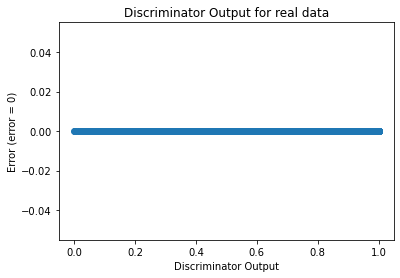

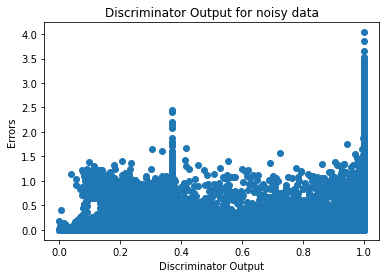

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)